# Module 5

## Problem 5.1
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean 252 , annual stdev = daily stdev sqrt(252) )

In [1]:
! dir/s

 Volume in drive D is Programming
 Volume Serial Number is A065-1032

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5

10-07-2020  10:33 PM    <DIR>          .
30-06-2020  04:08 PM    <DIR>          ..
27-06-2020  03:22 PM    <DIR>          .ipynb_checkpoints
27-06-2020  03:39 PM    <DIR>          Datasets Used
10-07-2020  10:33 PM           200,491 Module 5 Week 6.ipynb
               1 File(s)        200,491 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5\.ipynb_checkpoints

27-06-2020  03:22 PM    <DIR>          .
10-07-2020  10:33 PM    <DIR>          ..
10-07-2020  10:33 PM           200,491 Module 5 Week 6-checkpoint.ipynb
               1 File(s)        200,491 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5\Datasets Used

27-06-2020  03:39 PM    <DIR>          .
10-07-2020  10:33 PM    <DIR>          ..
14-05-2019  11:57 AM           114,78

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [3]:
df = pd.read_csv('Datasets Used/TCS.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df.drop(['Series'],axis = 1,inplace = True)
df.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,TCS,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [4]:
df['Daily Pct Change'] = df['Close Price'].pct_change()*100

daily_mean = df['Daily Pct Change'].mean()
daily_std = df['Daily Pct Change'].std()

annual_mean_return = round(daily_mean*252,2)
annual_std = round(daily_std*np.sqrt(252),2)

In [5]:
print("The annual return is: " + str(annual_mean_return))
print("The annual standard deviation is: " + str(annual_std))

The annual return is: 7.5
The annual standard deviation is: 43.16


## Problem 5.2

- Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. 

- Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

### __I have choosed 5 Datasets from Large_Cap, Mid_Cap and Small_Cap to diversify our portfolio. Those Cap Datasets are:__
1. RAYMOND
2. LT
3. IDBI
4. DHFL
5. CIPLA

### Here is the File Structure!

In [6]:
! dir/s

 Volume in drive D is Programming
 Volume Serial Number is A065-1032

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5

10-07-2020  10:33 PM    <DIR>          .
30-06-2020  04:08 PM    <DIR>          ..
27-06-2020  03:22 PM    <DIR>          .ipynb_checkpoints
27-06-2020  03:39 PM    <DIR>          Datasets Used
10-07-2020  10:33 PM           200,491 Module 5 Week 6.ipynb
               1 File(s)        200,491 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5\.ipynb_checkpoints

27-06-2020  03:22 PM    <DIR>          .
10-07-2020  10:33 PM    <DIR>          ..
10-07-2020  10:33 PM           200,491 Module 5 Week 6-checkpoint.ipynb
               1 File(s)        200,491 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 5\Datasets Used

27-06-2020  03:39 PM    <DIR>          .
10-07-2020  10:33 PM    <DIR>          ..
14-05-2019  11:57 AM           114,78

In [7]:
df1 = pd.read_csv('Datasets Used/RAYMOND.csv')
df1['Date'] = df1['Date'].astype('datetime64')
df1 = df1[df1.Series == 'EQ']
df1.set_index('Date',inplace = True)
df1.drop(['Series'],axis = 1,inplace = True)
df_Raymond = df1
df_Raymond.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,RAYMOND,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
2017-05-16,RAYMOND,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2017-05-17,RAYMOND,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
2017-05-18,RAYMOND,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
2017-05-19,RAYMOND,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


In [8]:
df_Raymond['Daily Pct Change'] = df_Raymond['Close Price'].pct_change()*100

daily_mean = df_Raymond['Daily Pct Change'].mean()
daily_std = df_Raymond['Daily Pct Change'].std()

annual_mean_raymond = round(daily_mean*252,2)
annual_std_raymond = round(daily_std*np.sqrt(252),2)

print("The annual return is: " + str(annual_mean_raymond))
print("The annual standard deviation is: " + str(annual_std_raymond))

The annual return is: 7.0
The annual standard deviation is: 36.38


In [9]:
df2 = pd.read_csv('Datasets Used/IDBI.csv')
df2['Date'] = df2['Date'].astype('datetime64')
df2 = df2[df2.Series == 'EQ']
df2.set_index('Date',inplace = True)
df2.drop(['Series'],axis = 1,inplace = True)
df_IDBI = df2
df_IDBI.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,IDBI,75.50,75.70,76.10,73.15,75.25,75.05,74.58,6688622,4.988258e+08,16062,1486475,22.22
2017-05-16,IDBI,75.05,75.30,77.75,73.85,77.05,76.65,75.38,8740098,6.587996e+08,24319,2578070,29.50
2017-05-17,IDBI,76.65,76.65,77.30,75.60,75.75,75.95,76.37,3152912,2.407824e+08,11386,643174,20.40
2017-05-18,IDBI,75.95,75.00,75.50,69.05,69.05,69.95,71.46,15086266,1.078020e+09,36259,2852529,18.91
2017-05-19,IDBI,69.95,69.00,70.95,68.50,68.70,68.75,69.42,10966153,7.612893e+08,39512,1949156,17.77


In [10]:
df_IDBI['Daily Pct Change'] = df_IDBI['Close Price'].pct_change()*100

daily_mean = df_IDBI['Daily Pct Change'].mean()
daily_std = df_IDBI['Daily Pct Change'].std()

annual_mean_IDBI = round(daily_mean*252,2)
annual_std_IDBI = round(daily_std*np.sqrt(252),2)

print("The annual return is: " + str(annual_mean_IDBI))
print("The annual standard deviation is: " + str(annual_std_IDBI))

The annual return is: -29.6
The annual standard deviation is: 45.38


In [11]:
df3 = pd.read_csv('Datasets Used/DHFL.csv')
df3['Date'] = df3['Date'].astype('datetime64')
df3 = df3[df3.Series == 'EQ']
df3.set_index('Date',inplace = True)
df3.drop(['Series'],axis = 1,inplace = True)
df_DHFL = df3
df_DHFL.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,DHFL,426.65,429.50,434.40,427.05,431.00,431.40,430.94,1160661,5.001759e+08,15111,295581,25.47
2017-05-16,DHFL,431.40,431.00,433.80,421.65,424.05,424.45,425.13,1662805,7.069152e+08,31644,681320,40.97
2017-05-17,DHFL,424.45,424.50,432.50,420.10,428.30,429.00,428.13,1443843,6.181483e+08,20808,371928,25.76
2017-05-18,DHFL,429.00,424.95,427.90,416.55,418.50,417.95,422.22,1639654,6.923007e+08,32812,534358,32.59
2017-05-19,DHFL,417.95,423.00,426.45,398.65,405.90,404.20,411.93,2693962,1.109716e+09,33554,884888,32.85


In [12]:
df_DHFL['Daily Pct Change'] = df_DHFL['Close Price'].pct_change()*100

daily_mean = df_DHFL['Daily Pct Change'].mean()
daily_std = df_DHFL['Daily Pct Change'].std()

annual_mean_DHFL = round(daily_mean*252,2)
annual_std_DHFL = round(daily_std*np.sqrt(252),2)

print("The annual return is: " + str(annual_mean_DHFL))
print("The annual standard deviation is: " + str(annual_std_DHFL))

The annual return is: -44.96
The annual standard deviation is: 66.29


In [13]:
df4 = pd.read_csv('Datasets Used/CIPLA.csv')
df4['Date'] = df4['Date'].astype('datetime64')
df4 = df4[df4.Series == 'EQ']
df4.set_index('Date',inplace = True)
df4.drop(['Series'],axis = 1,inplace = True)
df_Cipla = df4
df_Cipla.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,CIPLA,567.95,567.00,572.45,561.00,566.65,569.00,568.17,606569,3.446364e+08,20905,349445,57.61
2017-05-16,CIPLA,569.00,566.65,570.00,564.00,565.70,565.60,565.88,330195,1.868504e+08,13421,166079,50.30
2017-05-17,CIPLA,565.60,565.10,566.00,560.05,561.05,562.35,562.01,895238,5.031284e+08,35003,641507,71.66
2017-05-18,CIPLA,562.35,559.30,564.95,556.80,560.90,560.10,560.16,2155599,1.207477e+09,12636,1862981,86.43
2017-05-19,CIPLA,560.10,561.30,566.65,558.65,564.20,564.95,561.86,685662,3.852487e+08,10878,376701,54.94


In [14]:
df_Cipla['Daily Pct Change'] = df_Cipla['Close Price'].pct_change()*100

daily_mean = df_Cipla['Daily Pct Change'].mean()
daily_std = df_Cipla['Daily Pct Change'].std()

annual_mean_cipla = round(daily_mean*252,2)
annual_std_cipla = round(daily_std*np.sqrt(252),2)

print("The annual return is: " + str(annual_mean_cipla))
print("The annual standard deviation is: " + str(annual_std_cipla))

The annual return is: 1.18
The annual standard deviation is: 25.45


In [15]:
df5 = pd.read_csv('Datasets Used/LT.csv')
df5['Date'] = df5['Date'].astype('datetime64')
df5 = df5[df5.Series == 'EQ']
df5.set_index('Date',inplace = True)
df5.drop(['Series'],axis = 1,inplace = True)
df_LT = df5
df_LT.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,LT,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
2017-05-16,LT,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2017-05-17,LT,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
2017-05-18,LT,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
2017-05-19,LT,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [16]:
df_LT['Daily Pct Change'] = df_LT['Close Price'].pct_change()*100

daily_mean = df_LT['Daily Pct Change'].mean()
daily_std = df_LT['Daily Pct Change'].std()

annual_mean_lt = round(daily_mean*252,2)
annual_std_lt = round(daily_std*np.sqrt(252),2)

print("The annual return is: " + str(annual_mean_lt))
print("The annual standard deviation is: " + str(annual_std_lt))

The annual return is: -8.59
The annual standard deviation is: 31.43


## Problem 5.3
- Prepare a scatter plot for differing weights of the individual stocks in the portfolio, the axes being the returns and volatility. 

- Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [17]:
portfolio = pd.concat([df_Raymond['Daily Pct Change'],df_IDBI['Daily Pct Change'],df_DHFL['Daily Pct Change'],
                      df_Cipla['Daily Pct Change'],df_LT['Daily Pct Change']],axis = 1)
portfolio.dropna(inplace = True)
portfolio.columns = ['Raymond','IDBI','DHFL','Cipla','LT']
portfolio.head()

,Raymond,IDBI,DHFL,Cipla,LT
Date,,,,,
2017-05-16,1.578675,2.131912,-1.611034,-0.597540,-0.097567
2017-05-17,-0.171975,-0.913242,1.071975,-0.574611,0.847360
2017-05-18,-4.683213,-7.899934,-2.575758,-0.400107,-1.871315
2017-05-19,-3.192985,-1.715511,-3.289867,0.865917,0.113201
2017-05-22,-0.988798,-3.709091,-0.049480,-0.327463,1.588820


In [18]:
np.random.seed(42)

num_ports = len(portfolio.index)

all_weights = np.zeros((num_ports, len(portfolio.columns)))

ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)

sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    all_weights[x,:] = weights
    
    ret_arr[x] = np.sum( (portfolio.mean() * weights * 252))
    
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(portfolio.cov()*252, weights)))
    
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

## Problem 5.4
Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest.

In [19]:
max_shr_ratio = sharpe_arr.argmax()
max_shr_ratio

240

In [20]:
min_vol = vol_arr.argmin()
min_vol

280

<IPython.core.display.Javascript object>


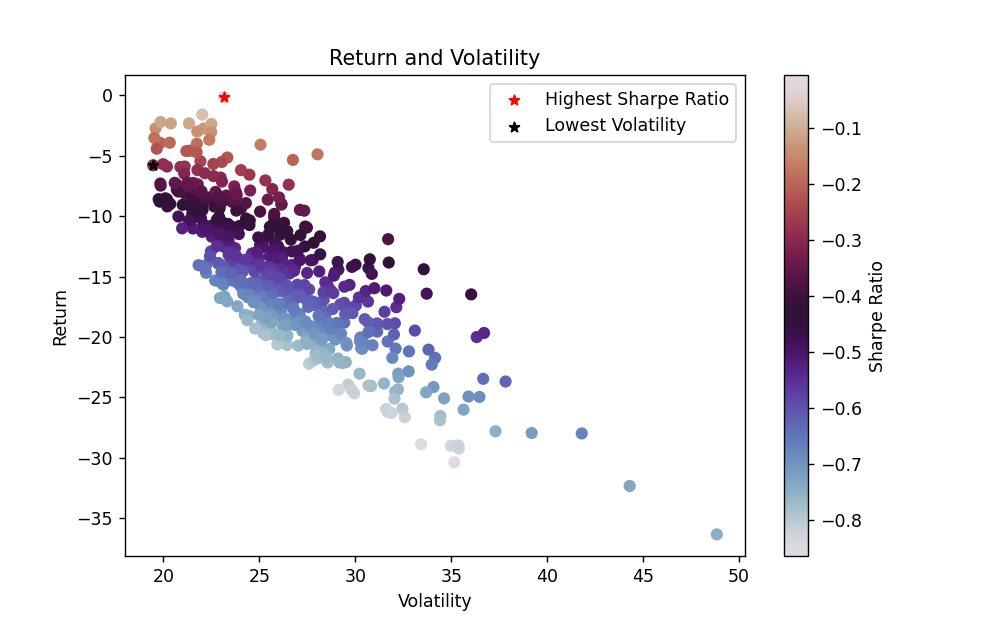

In [21]:
plt.figure(figsize=(8, 5))
plt.title("Return and Volatility")
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='twilight')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol_arr[max_shr_ratio],ret_arr[max_shr_ratio],marker = '*',c = 'red',label = 'Highest Sharpe Ratio')
plt.scatter(vol_arr[min_vol],ret_arr[min_vol],marker = '*',c = 'black',label = 'Lowest Volatility')
plt.legend()
plt.show()